###Data importation  

In [1]:
! pip install -q kaggle 



In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json  

In [5]:
! kaggle datasets download -d  imakash3011/customer-personality-analysis  

  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 42.8MB/s]


In [6]:
! unzip  customer-personality-analysis.zip  

Archive:  customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


In [7]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  
import altair as alt   
import numpy as np 
from math import  *


In [8]:
costum=pd.read_csv('marketing_campaign.csv' , sep="\t")  


###People :

ID: Customer's unique identifier.   
Year_Birth: Customer's birth year.    
Education: Customer's education level. 
Marital_Status: Customer's marital status.  
Income: Customer's yearly household income. 
Kidhome: Number of children in customer's household. 
Teenhome: Number of teenagers in customer's household.  
Dt_Customer: Date of customer's enrollment with the company. 
Recency: Number of days since customer's last purchase.  
Complain: 1 if the customer complained in the last 2 years, 0 otherwise.   


### Products

MntWines: Amount spent on wine in last 2 years.   
MntFruits: Amount spent on fruits in last 2 years.   
MntMeatProducts: Amount spent on meat in last 2 years.   
MntFishProducts: Amount spent on fish in last 2 years.     
MntSweetProducts: Amount spent on sweets in last 2 years.   
MntGoldProds: Amount spent on gold in last 2 years.     


###Targer  

The customer personal situation : 'singl' , 'marrierd' ,'in relation'. 

### Data 

WE will use just Customer charatiristic and products which customer purchase.


# Data preparation 

In [9]:
costum.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
costum.describe()  

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
New_data=costum[costum.columns[0:15]]   

In [12]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2240 non-null   int64  
 1   Year_Birth        2240 non-null   int64  
 2   Education         2240 non-null   object 
 3   Marital_Status    2240 non-null   object 
 4   Income            2216 non-null   float64
 5   Kidhome           2240 non-null   int64  
 6   Teenhome          2240 non-null   int64  
 7   Dt_Customer       2240 non-null   object 
 8   Recency           2240 non-null   int64  
 9   MntWines          2240 non-null   int64  
 10  MntFruits         2240 non-null   int64  
 11  MntMeatProducts   2240 non-null   int64  
 12  MntFishProducts   2240 non-null   int64  
 13  MntSweetProducts  2240 non-null   int64  
 14  MntGoldProds      2240 non-null   int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 262.6+ KB


In [13]:
New_data.describe()  

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


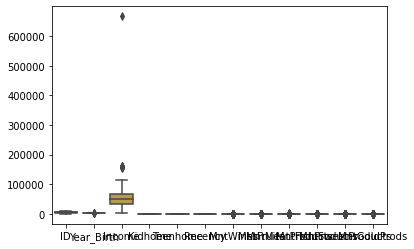

In [14]:
sns.boxplot(data = New_data) 

In [15]:
New_data['Age']=2020-New_data['Year_Birth']     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
New_data.Marital_Status.unique() 

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [17]:
def statu_class (x) : 
   if x in ['Single' ,'Alone' , 'Absurd', 'YOLO',] :   # Yolo means la vida loca  
      return (0)   
   if x in ['Divorced','Widow'] : 
      return (1) 
   if x in ['Together' ,'Married'] :  
      return (2)    
 

In [18]:
def educ_class (x) : 
   if x in ['2n Cycle', 'Basic'] :   # Yolo means la vida loca  
      return (0)   
   if x in ['Graduation'] : 
      return (1) 
   if x in ['Master'] :   
      return (2)  
   if x in  ['PhD'] : 
      return (3)

In [19]:
def out_outlier(i) :   
  if i>np.percentile(x, 25) and i<np.percentile(x, 75) : 
      k.append(i)   
  return(k)                                                                      
  

In [20]:
New_data['educ_level']=New_data['Education'].map(lambda t : educ_class(t) )  
New_data['situation_am']=New_data['Marital_Status'].map(lambda t : statu_class(t) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


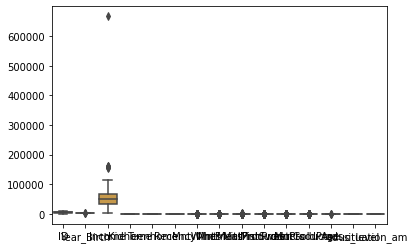

In [21]:
sns.boxplot( data = New_data)  

In [22]:
New_data.isna().sum()    

ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income              24
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
Age                  0
educ_level           0
situation_am         0
dtype: int64

In [23]:
New_data= New_data.dropna() 

In [24]:
New_data.isna().sum() 

ID                  0
Year_Birth          0
Education           0
Marital_Status      0
Income              0
Kidhome             0
Teenhome            0
Dt_Customer         0
Recency             0
MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
Age                 0
educ_level          0
situation_am        0
dtype: int64

In [25]:
New_data['Income']=New_data['Income'].map(lambda t : floor(t))   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
New_data['Income']=np.log(New_data['Income'])  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


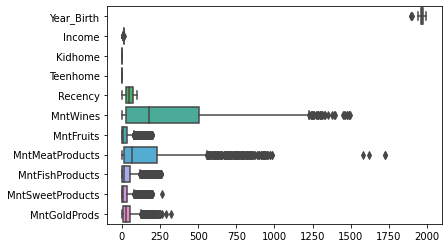

In [27]:
sns.boxplot( data = New_data[New_data.columns[1:15]] , orient="h")     

In [28]:
names=New_data.columns         
names[8:16]

Index(['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Age'],
      dtype='object')

In [29]:
train11=New_data

In [30]:

for name in names[8:16] : 
    train11=train11[(train11[name] <= np.percentile(train11[name], 75))]  
    train11=train11[train11[name] >= np.percentile(train11[name], 25)]  
##train 

In [31]:
train11 ##this data is data is without ouliers but very small with 60 items    

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,educ_level,situation_am
86,273,1970,Master,Married,10.495100,1,1,16-07-2013,48,130,0,16,0,0,5,50,2,2
134,5290,1964,PhD,Married,10.634677,1,1,14-08-2013,51,220,0,33,3,0,23,56,3,2
212,6927,1968,PhD,Married,10.700477,1,1,05-10-2012,70,224,0,30,0,0,10,52,3,2
250,10236,1975,Master,Single,10.346890,1,0,16-09-2013,59,16,3,25,6,1,13,45,2,0
265,6690,1966,Master,Married,10.550041,1,1,14-03-2013,30,38,4,22,4,2,20,54,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,1158,1966,Graduation,Divorced,10.797062,0,1,05-01-2014,27,102,1,15,2,0,24,54,1,1
2135,10127,1965,Graduation,Married,10.980059,0,1,06-04-2014,21,301,11,61,4,7,11,55,1,2
2142,7124,1968,Graduation,Divorced,10.518592,1,1,01-02-2013,72,43,4,12,8,0,27,52,1,1
2180,1321,1974,Graduation,Married,10.168425,1,0,04-11-2013,49,22,2,18,0,2,12,46,1,2


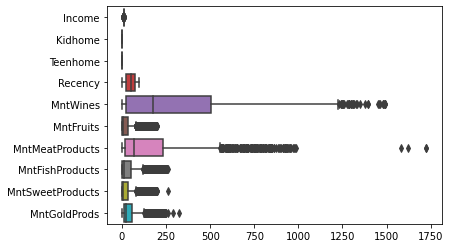

In [32]:
sns.boxplot( data = New_data[New_data.columns[2:15]] , orient="h")   

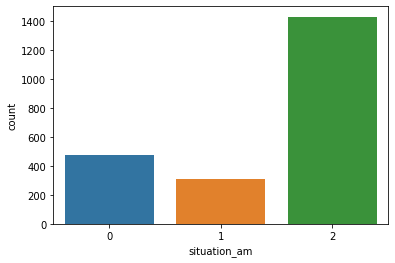

In [33]:
sns.countplot(x='situation_am',data=New_data) 

Umbalanced target Value "Problem"  

In [34]:
names

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Age', 'educ_level', 'situation_am'],
      dtype='object')

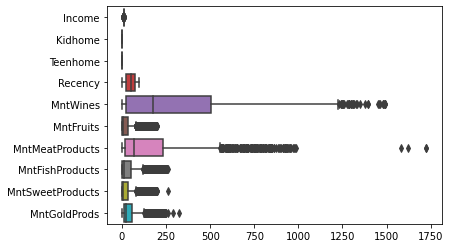

In [35]:
sns.boxplot( data = New_data[New_data.columns[2:15]] , orient="h")

# Clustring  

In [ ]:
import random

random.seed(140)

In [ ]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids  

In [ ]:
New_data.columns

In [ ]:
X=New_data[['Income' ,'Kidhome','Teenhome','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','educ_level','Age']]  

In [ ]:
inertias = [] # our WSS
ks = range(1, 10)
# Creating 10 K-Mean++ models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters = k, init = 'k-means++', n_init = 1, random_state = 0)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

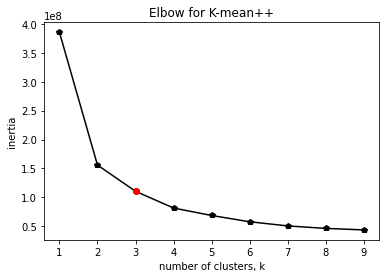

In [ ]:
plt.plot(range(1,10), inertias, '-p', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.plot(3,inertias[2],'ro')
plt.xticks(ks)
plt.title('Elbow for K-mean++')
plt.show()

In [ ]:
model = KMeans(n_clusters=3, init = 'k-means++', n_init = 20) 
model.fit(X)

# coordinates of cluster center
centroids = model.cluster_centers_ 

# cluster label for each data point
labels = model.labels_  

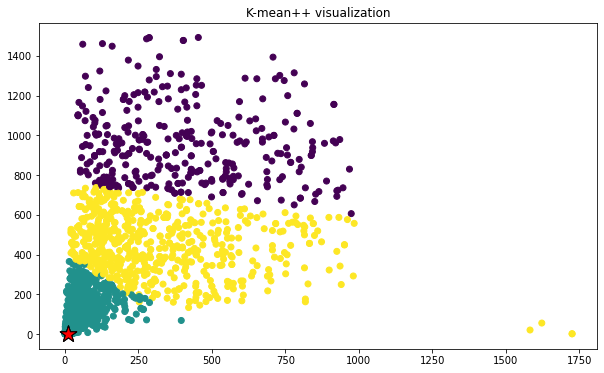

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(X['MntMeatProducts'], X['MntWines'] , c=labels)
plt.scatter( centroids[:, 0], centroids[:, 1], s=300, marker='*', c='red', edgecolor='black')
plt.title('K-mean++ visualization')
plt.show()

The cluster are maded by volume of customers purchcase we have Three type of  
customers :   
   

1.   main customers : with high quantity of purchase presented with purple points in the plot 
2.   medium customers :with midium quantity of purchase presented with yellow points in the plot  
3.   small customers : with low quantity of purchase presented with green points in the plot  





#Feature engirinng ❎  

In [36]:
corr_matrix = New_data.corr() 
corr_matrix.style.background_gradient(cmap='coolwarm')

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,educ_level,situation_am
ID,1.000000,0.002355,-0.014108,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,-0.005936,-0.011172,-0.002355,-0.005264,0.019543
Year_Birth,0.002355,1.000000,-0.227484,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,-0.020204,-0.064208,-1.000000,-0.175899,-0.059663
Income,-0.014108,-0.227484,1.000000,-0.457009,0.119855,0.005916,0.631444,0.444830,0.567451,0.457293,0.451899,0.354239,0.227484,0.176364,0.018118
Kidhome,0.001736,0.233615,-0.457009,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,-0.378026,-0.355029,-0.233615,-0.047541,0.008605
Teenhome,-0.003030,-0.350791,0.119855,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,-0.163056,-0.019887,0.350791,0.124724,0.067411
Recency,-0.044376,-0.016295,0.005916,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.016295,-0.015070,0.000189
MntWines,-0.021084,-0.159451,0.631444,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.159451,0.203549,0.006699
MntFruits,0.007326,-0.017747,0.444830,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,0.017747,-0.089856,-0.021031
MntMeatProducts,-0.005902,-0.033697,0.567451,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,0.033697,0.033557,-0.033244
MntFishProducts,-0.023992,-0.040425,0.457293,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,0.040425,-0.117011,-0.017611


In [37]:
New_data.head(10) 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,educ_level,situation_am
0,5524,1957,Graduation,Single,10.970575,0,0,04-09-2012,58,635,88,546,172,88,88,63,1,0
1,2174,1954,Graduation,Single,10.743847,1,1,08-03-2014,38,11,1,6,2,1,6,66,1,0
2,4141,1965,Graduation,Together,11.179032,0,0,21-08-2013,26,426,49,127,111,21,42,55,1,2
3,6182,1984,Graduation,Together,10.190394,1,0,10-02-2014,26,11,4,20,10,3,5,36,1,2
4,5324,1981,PhD,Married,10.973237,1,0,19-01-2014,94,173,43,118,46,27,15,39,3,2
5,7446,1967,Master,Together,11.043130,0,1,09-09-2013,16,520,42,98,0,42,14,53,2,2
6,965,1971,Graduation,Divorced,10.926568,0,1,13-11-2012,34,235,65,164,50,49,27,49,1,1
7,6177,1985,PhD,Married,10.417927,1,0,08-05-2013,32,76,10,56,3,1,23,35,3,2
8,4855,1974,PhD,Together,10.320585,1,0,06-06-2013,19,14,0,24,3,3,2,46,3,2
9,5899,1950,PhD,Together,8.639057,1,1,13-03-2014,68,28,0,6,1,1,13,70,3,2


we will creat variable depencies which is the sum of all purchase of client :

In [38]:
##we creat new variable which mesure the purchase and income or part of income not depenced  
#MntWines	MntFruits	MntMeatProducts	MntFishProducts	MntSweetProducts	MntGoldProds
depences=(New_data['MntWines']+New_data['MntFruits']+New_data['MntMeatProducts']+New_data['MntFishProducts']+ 
            New_data['MntSweetProducts']+New_data['MntGoldProds']) 
          

In [39]:
depences

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Length: 2216, dtype: int64

We creat a variable 'marginal_savings_rate' which mesure the save of customers and this variable show as the risque behavioral of client face of risque and if client have family this variable will be high for example  :

In [40]:
New_data['marginal_savings_rate']=round(1-(depences/(np.exp(New_data['Income'])/20)) ,3)  

In [41]:
New_data['marginal_savings_rate']  

0       0.444
1       0.988
2       0.783
3       0.960
4       0.855
        ...  
2235    0.562
2236    0.861
2237    0.564
2238    0.757
2239    0.935
Name: marginal_savings_rate, Length: 2216, dtype: float64

In [42]:
New_data['alocol_logp']=round(New_data['MntWines']/depences ,3)

In [43]:
New_data['alocol_logp']   

0       0.393
1       0.407
2       0.549
3       0.208
4       0.410
        ...  
2235    0.529
2236    0.914
2237    0.732
2238    0.508
2239    0.488
Name: alocol_logp, Length: 2216, dtype: float64

We will creat variables which show us the proption of the product purchased like alcool , sweets , Fruits , ect :

In [44]:
New_data['eat_product_logp']=round((New_data['MntFruits']+New_data['MntMeatProducts']+New_data['MntFishProducts'])/depences ,3)

In [45]:
New_data['eat_product_logp']

0       0.498
1       0.333
2       0.370
3       0.642
4       0.491
        ...  
2235    0.199
2236    0.068
2237    0.239
2238    0.384
2239    0.384
Name: eat_product_logp, Length: 2216, dtype: float64

In [46]:
New_data['Sweet_logp']=round((New_data['MntSweetProducts'])/depences ,3 )
New_data['Gold_logp']=round((New_data['MntGoldProds'])/depences  , 3) 

We creat variable Poor which equal to 1 if client's income is less then 30% quantile and client age less then 35 : 

In [47]:
poor=[]
for index ,row in New_data.iterrows(): 
    if New_data['Age'][index] > 32 and exp(New_data['Income'][index])<= np.exp(New_data['Income']).quantile(0.30) : 
        poor.append(1) 
    else : 
        poor.append(0)

In [48]:
New_data['poor']=poor

In [49]:
del poor

In [50]:
New_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,Age,educ_level,situation_am,marginal_savings_rate,alocol_logp,eat_product_logp,Sweet_logp,Gold_logp,poor
0,5524,1957,Graduation,Single,10.970575,0,0,04-09-2012,58,635,...,88,63,1,0,0.444,0.393,0.498,0.054,0.054,0
1,2174,1954,Graduation,Single,10.743847,1,1,08-03-2014,38,11,...,6,66,1,0,0.988,0.407,0.333,0.037,0.222,0
2,4141,1965,Graduation,Together,11.179032,0,0,21-08-2013,26,426,...,42,55,1,2,0.783,0.549,0.370,0.027,0.054,0
3,6182,1984,Graduation,Together,10.190394,1,0,10-02-2014,26,11,...,5,36,1,2,0.960,0.208,0.642,0.057,0.094,1
4,5324,1981,PhD,Married,10.973237,1,0,19-01-2014,94,173,...,15,39,3,2,0.855,0.410,0.491,0.064,0.036,0


In [51]:
New_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Age', 'educ_level', 'situation_am',
       'marginal_savings_rate', 'alocol_logp', 'eat_product_logp',
       'Sweet_logp', 'Gold_logp', 'poor'],
      dtype='object')

We take potentiel predictors into a new data frame : 

In [52]:
pred_df=New_data[[ 'Kidhome',
       'Teenhome', 'situation_am', 'marginal_savings_rate',
       'alocol_logp', 'eat_product_logp', 'Sweet_logp', 'Gold_logp', 'poor']]

In [53]:
pred_df.head()

,Kidhome,Teenhome,situation_am,marginal_savings_rate,alocol_logp,eat_product_logp,Sweet_logp,Gold_logp,poor
0,0,0,0,0.444,0.393,0.498,0.054,0.054,0
1,1,1,0,0.988,0.407,0.333,0.037,0.222,0
2,0,0,2,0.783,0.549,0.370,0.027,0.054,0
3,1,0,2,0.960,0.208,0.642,0.057,0.094,1
4,1,0,2,0.855,0.410,0.491,0.064,0.036,0


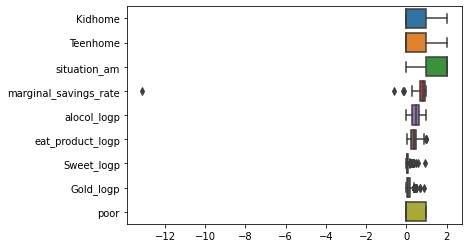

In [54]:
sns.boxplot(data = pred_df , orient="h")     

In [55]:
corr_matrix = pred_df.corr()  
corr_matrix.style.background_gradient(cmap='coolwarm')

,Kidhome,Teenhome,situation_am,marginal_savings_rate,alocol_logp,eat_product_logp,Sweet_logp,Gold_logp,poor
Kidhome,1.000000,-0.039869,0.008605,0.243184,-0.160331,0.030404,0.009748,0.283645,0.444106
Teenhome,-0.039869,1.000000,0.067411,0.063625,0.452870,-0.462749,-0.235727,-0.098800,-0.213094
situation_am,0.008605,0.067411,1.000000,-0.001396,0.046533,-0.041042,-0.001058,-0.033150,0.009224
marginal_savings_rate,0.243184,0.063625,-0.001396,1.000000,-0.049947,-0.066103,0.062295,0.172617,0.193542
alocol_logp,-0.160331,0.452870,0.046533,-0.049947,1.000000,-0.808867,-0.552047,-0.532199,-0.399582
eat_product_logp,0.030404,-0.462749,-0.041042,-0.066103,-0.808867,1.000000,0.252869,0.001069,0.191656
Sweet_logp,0.009748,-0.235727,-0.001058,0.062295,-0.552047,0.252869,1.000000,0.206288,0.177773
Gold_logp,0.283645,-0.098800,-0.033150,0.172617,-0.532199,0.001069,0.206288,1.000000,0.441111
poor,0.444106,-0.213094,0.009224,0.193542,-0.399582,0.191656,0.177773,0.441111,1.000000


## Prediction Modele : 

In [56]:
X=pred_df.drop(columns=['situation_am'])   

In [57]:
y=pred_df.situation_am  
X=pred_df.drop(columns=['situation_am'])

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score 
from sklearn.preprocessing import normalize  
from sklearn.naive_bayes import GaussianNB   
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 


In [59]:
X_norm=normalize(X, norm='l2', copy=True, return_norm=False)   
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=0,test_size=0.20) 

In [ ]:
log_model=LogisticRegression(penalty='l2',fit_intercept=False, intercept_scaling=1, class_weight='balanced') 
log_model.fit(X_train ,y_train) 
y_pred=log_model.predict(X_test)  
classification_report(y_test ,y_pred)

              precision    recall  f1-score   support

           0       0.30      0.53      0.38        97
           1       0.14      0.53      0.23        60
           2       0.66      0.12      0.21       287

    accuracy                           0.27       444
    macro avg       0.37      0.39      0.27       444
    weighted avg    0.51      0.27      0.25       444



The logistic model does not have a good choice lacks precision and this is due to the lack of inter-class balance or the calculation of the odds ratio becomes biased despite the fact that the model is teamed by weights to rebalance the model       

In [ ]:
lig_model=GaussianNB()
lig_model.fit(X_train ,y_train) 
y_pred=lig_model.predict(X_test) 
accuracy_score(y_test ,y_pred) 
classification_report(y_test ,y_pred) 

              precision    recall  f1-score   support

           0       0.31      0.05      0.09        97
           1       0.00      0.00      0.00        60
           2       0.65      0.97      0.77       287

    accuracy                            0.64       444
    macro avg       0.32      0.34      0.29       444
    weighted avg    0.49      0.64      0.52       444



This model is better than logistic regression but fails to predict divorced customers and it is due to similarities to single class if they have no children and to married class if they have children .

In [71]:
forest = RandomForestClassifier(n_estimators=1000 , criterion='gini',
               max_features='sqrt', max_leaf_nodes=None,  class_weight='balanced_subsample', ccp_alpha=0.0, max_samples=None) 
model=forest.fit(X_train ,y_train)  
y_pred=model.predict(X_test)
accuracy_score(y_test ,y_pred) 



0.6869369369369369

In [ ]:
classification_report(y_test ,y_pred) 

              precision    recall  f1-score   support

           0       0.68      0.18      0.28        97
           1       0.73      0.18      0.29        60
           2       0.69      0.97      0.80       287

    accuracy                            0.69       444
    macro avg       0.70      0.44      0.46       444
    weighted avg    0.69      0.69      0.62       444





This model performs with a prediction of 70% with:
* 68% prediction accuracy if the consumer is single.
* 73% prediction accuracy if consumer is divorced or widowed.
* 69% prediction accuracy if the consumer is in a relationship or married.

Limits and challenges of prediction: 


1. Database not large enough therefore lack of varied information that can help the model to learn
2. the target variable is not balanced or one class dominates the others, which results in this class being able to absorb more variety than others
3. the target variable is weakly correlated with the pridictors which poses a problem of prediction in terms of the influence of the predictors and this is the main reason which explains the performance of random forst compared to the other models because it selects the pridctors randomly.
4. in the end the best way to judge a model is to set it up with other simulated data or future data 

